In [1]:
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
sys.path.append(parent_path) # add current terminal path to sys.path

import gym

from envs.gridworld_env import CliffWalkingWapper, FrozenLakeWapper
from QLearning.agent import QLearning
from common.plot import plot_rewards
from common.utils import save_results

In [2]:
class QlearningConfig:
    '''训练相关参数'''
    def __init__(self):
        self.train_eps = 200 # 训练的episode数目
        self.gamma = 0.9 # reward的衰减率
        self.epsilon_start = 0.99 # e-greedy策略中初始epsilon
        self.epsilon_end = 0.01 # e-greedy策略中的终止epsilon
        self.epsilon_decay = 200 # e-greedy策略中epsilon的衰减率
        self.lr = 0.1 # learning rate

In [3]:
def train(cfg,env,agent):
    rewards = []  
    ma_rewards = [] # moving average reward
    steps = []  # 记录所有episode的steps
    for i_episode in range(cfg.train_eps):
        ep_reward = 0  # 记录每个episode的reward
        ep_steps = 0  # 记录每个episode走了多少step
        state = env.reset()  # 重置环境, 重新开一局（即开始新的一个episode）
        while True:
            action = agent.choose_action(state)  # 根据算法选择一个动作
            next_state, reward, done, _ = env.step(action)  # 与环境进行一次动作交互
            agent.update(state, action, reward, next_state, done)  # Q-learning算法更新
            state = next_state  # 存储上一个观察值
            ep_reward += reward
            ep_steps += 1  # 计算step数
            if done:
                break
        steps.append(ep_steps)
        rewards.append(ep_reward)
        if ma_rewards:
            ma_rewards.append(ma_rewards[-1]*0.9+ep_reward*0.1)
        else:
            ma_rewards.append(ep_reward)
        if (i_episode+1)%10==0:
            print("Episode:{}/{}: reward:{:.1f}".format(i_episode+1, cfg.train_eps,ep_reward))
    return rewards,ma_rewards

Episode:10/200: reward:-82.0
Episode:20/200: reward:-59.0
Episode:30/200: reward:-50.0
Episode:40/200: reward:-32.0
Episode:50/200: reward:-102.0
Episode:60/200: reward:-151.0
Episode:70/200: reward:-34.0
Episode:80/200: reward:-71.0
Episode:90/200: reward:-34.0
Episode:100/200: reward:-26.0
Episode:110/200: reward:-32.0
Episode:120/200: reward:-48.0
Episode:130/200: reward:-25.0
Episode:140/200: reward:-31.0
Episode:150/200: reward:-38.0
Episode:160/200: reward:-47.0
Episode:170/200: reward:-29.0
Episode:180/200: reward:-36.0
Episode:190/200: reward:-21.0
Episode:200/200: reward:-34.0


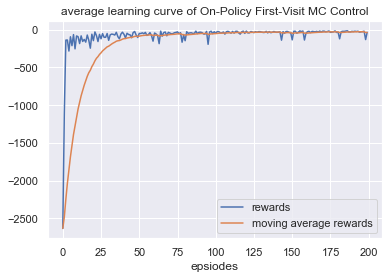

In [4]:
cfg = QlearningConfig()
env = gym.make("CliffWalking-v0")  # 0 up, 1 right, 2 down, 3 left
env = CliffWalkingWapper(env)
action_dim = env.action_space.n
agent = QLearning(action_dim,cfg)
rewards,ma_rewards = train(cfg,env,agent)
plot_rewards(rewards,ma_rewards,tag="train",algo = "On-Policy First-Visit MC Control",save=False)